<a href="https://colab.research.google.com/github/Larissaanzolin/Controle/blob/main/controle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install control

     |████████████████████████████████| 339 kB 2.0 MB/s 
  Created wheel for control: filename=control-0.9.0-py2.py3-none-any.whl size=344928 sha256=bbbb158fd1e7cd60662616aa01a0b77baffba3d534b201fcbb19d579ca04539b
  Stored in directory: /root/.cache/pip/wheels/5b/64/54/70faad181d7baff1184541ca00c9a2efa633acd0a811831d30
Successfully built control


Importação da biblioteca

In [ ]:
import control.matlab as ctr

## Funções de Tranferência

In [ ]:
num1 = [0.01758,0.01540008]
den1 = [1,-1.06703,0.6703]
G1 = ctr.tf(num1,den1)
print(G1)


  0.01758 s + 0.0154
----------------------
s^2 - 1.067 s + 0.6703



In [ ]:
ctr.tf(num1,den1)

TransferFunction(array([0.01758   , 0.01540008]), array([ 1.     , -1.06703,  0.6703 ]))

In [ ]:
polos = ctr.pole(G1)
zeros = ctr.zero(G1)
print('Polos =>', polos)
print('Zeros =>', zeros)

Polos => [0.533515+0.6210167j 0.533515-0.6210167j]
Zeros => [-0.876]


Obs.: Para avaliae o valor da FT para determinado ponto $s_1$


In [ ]:
ctr.evalfr(G1, 1+1j)

(0.003227608496111757-0.036722047995822384j)

# Trabalhando com diagramas de blocos

In [ ]:
num2 = [12.67,-8.492701]
den2 = [1,-0.2543]
G2 = ctr.tf(num2,den2)
print(G2)


12.67 s - 8.493
---------------
  s - 0.2543



Blocos em Cascata(série)

In [ ]:
Gserie = G1 * G2
print(Gserie)


  0.2227 s^2 + 0.04582 s - 0.1308
-----------------------------------
s^3 - 1.321 s^2 + 0.9416 s - 0.1705



In [ ]:
print('Polos Gserie',ctr.pole(Gserie))
print('Zeros Gserie',ctr.zero(Gserie))

Polos Gserie [0.533515+0.6210167j 0.533515-0.6210167j 0.2543  +0.j       ]
Zeros Gserie [-0.876   0.6703]


Obs.:

In [ ]:
Gserie_1 = ctr.series(G1,G2)
print(Gserie_1)


  0.2227 s^2 + 0.04582 s - 0.1308
-----------------------------------
s^3 - 1.321 s^2 + 0.9416 s - 0.1705



Blocos em Paralelo

In [ ]:
Gparalelo = G1 + G2
print (Gparalelo)


s^2 + 4 s + 5
-------------
s^2 + 4 s + 3



In [ ]:
Gparalelo1 = ctr.parallel(G1,G2)
print (Gparalelo)


s^2 + 4 s + 5
-------------
s^2 + 4 s + 3



Realimentação


In [ ]:
T = ctr.feedback(G1, G2, sign=-1)
print(T)


0.01758 s^2 + 0.01093 s - 0.003916
-----------------------------------
s^3 - 1.099 s^2 + 0.9875 s - 0.3012



Estabilidade


In [ ]:
print('Polos de malha fechada:', ctr.pole(T))


Polos de malha fechada: [0.33407895+0.76697899j 0.33407895-0.76697899j 0.4304335 +0.j        ]


# Análise Transitória


Resposta ao Degrau Unitário

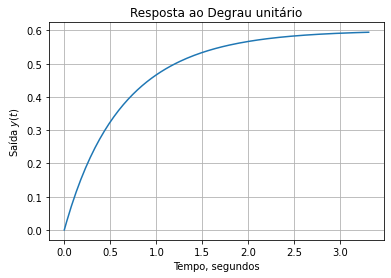

In [ ]:
import matplotlib.pyplot as plt
y, t =ctr.step(T)

plt.plot(t,y)
plt.xlabel('Tempo, segundos')
plt.ylabel('Saída $y(t)$')
plt.title('Resposta ao Degrau unitário')
plt.grid()

Resposta ao Impulso Unitário


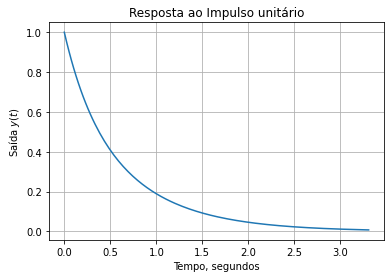

In [ ]:

y, t =ctr.impulse(T)

plt.plot(t,y)
plt.xlabel('Tempo, segundos')
plt.ylabel('Saída $y(t)$')
plt.title('Resposta ao Impulso unitário')
plt.grid()

Resposta a Rampa Unitária

Integrador 
1
-
s



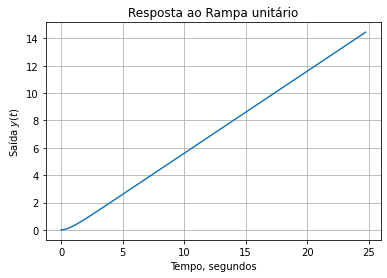

In [ ]:
integrador = ctr.tf([1],[1,0])
print('Integrador',integrador)

y, t =ctr.step(integrador*T)

plt.plot(t,y)
plt.xlabel('Tempo, segundos')
plt.ylabel('Saída $y(t)$')
plt.title('Resposta ao Rampa unitário')
plt.grid()

Sistema de 2º Ordem -Resposta ao degrau (forma canônica)

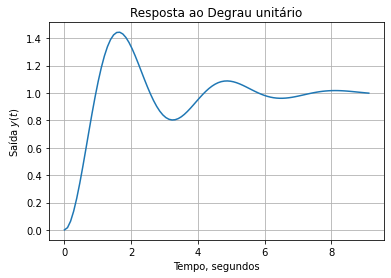

In [ ]:
wn =2
zeta = 0.25

F = ctr.tf([wn**2],[1,2*zeta*wn, wn**2])

y, t =ctr.step(F)

plt.plot(t,y)
plt.xlabel('Tempo, segundos')
plt.ylabel('Saída $y(t)$')
plt.title('Resposta ao Degrau unitário')
plt.grid()


In [ ]:
print(F)


     4
-----------
s^2 + s + 4



In [ ]:
ctr.damp(F)

_____Eigenvalue______ Damping___ Frequency_
      -0.5    +1.936j       0.25          2
      -0.5    -1.936j       0.25          2


(array([2., 2.]),
 array([0.25, 0.25]),
 array([-0.5+1.93649167j, -0.5-1.93649167j]))

In [ ]:
ctr.stepinfo(F)

{'Overshoot': 44.519809068148646,
 'Peak': 1.4432347690137854,
 'PeakTime': 1.6578612669557133,
 'RiseTime': 0.6447238260383329,
 'SettlingMax': 1.4432347690137854,
 'SettlingMin': 0.8027336167625623,
 'SettlingTime': 7.091962086421662,
 'SteadyStateValue': 0.9986414861185049,
 'Undershoot': 0.0}